Обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева

In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, plot_confusion_matrix, \
    plot_precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [ ]:
train_iris = pd.read_csv('/gdrive/My Drive/data/train_iris.csv')
test_iris = pd.read_csv('/gdrive/My Drive/data/test_iris.csv')

In [ ]:
train_iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [ ]:
#выбрасываем ненужную колонку
train_iris.drop(['Unnamed: 0'], axis=1, inplace=True)
test_iris.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
#!! раздельные датасеты для трейна и теста -- делим на выборки !!
X_train, y_train = train_iris.iloc[:,:-1], train_iris.iloc[:,-1]
X_test, y_test = test_iris.iloc[:,:-1], test_iris.iloc[:,-1]

In [ ]:
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [ ]:
# отдельный датасет для результатов точности, просчет точности для деревьев с глубиной от 1 до 100
np.random.seed(0)
scores = pd.DataFrame()

for max_depth in range(1, 101):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    scores = scores.append(temp)

scores.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [ ]:
scores = pd.melt(
    scores,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score'],
    var_name='type',
    value_name='score'
)
scores.head()

,max_depth,type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


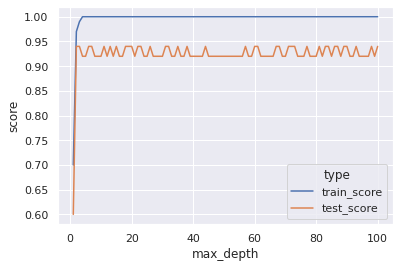

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='type', data=scores)